In [2]:
import pandas as pd
import sklearn as sk
import numpy as np
import random
%matplotlib inline

In [3]:
filename = "cs-training.csv"
data = pd.read_csv(filename)

In [4]:
data = data.dropna(axis=0)

In [5]:
data = data.drop(labels=["Unnamed: 0"], axis=1)

### Data dictionary

**SeriousDlqin2yrs** Person experienced 90 days past due delinquency or worse

**RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age**	Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome**: Monthly income

**NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

In [6]:
data = data.drop(data[data.MonthlyIncome <= 1].index)

In [563]:
max(data["RevolvingUtilizationOfUnsecuredLines"])

50708.0

Counter = 171


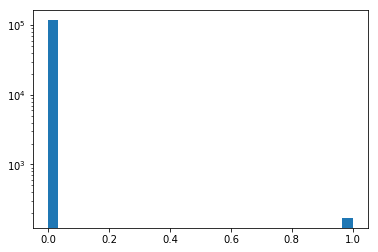

In [589]:
plt.yscale('log', nonposy='clip')
plt.hist(data["RevolvingUtilizationOfUnsecuredLines"]>10, bins=30)

counter = 0
for i in range(0,data.shape[0]):
    if (data.iloc[i]["RevolvingUtilizationOfUnsecuredLines"] > 10):
        counter +=1
print ("Counter = " + str(counter))

In [587]:
counter

2742

In [568]:
data.loc[data["RevolvingUtilizationOfUnsecuredLines"].idxmax()]

SeriousDlqin2yrs                            0.000000
RevolvingUtilizationOfUnsecuredLines    50708.000000
age                                        55.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.221757
MonthlyIncome                           38000.000000
NumberOfOpenCreditLinesAndLoans             7.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                2.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          0.000000
Name: 85489, dtype: float64

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                             GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

from numpy import loadtxt
from xgboost import XGBClassifier

/home/tatiana/anaconda3/envs/my_projects_env/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
featureHeaders = list(data.columns)
targetFeature = 'SeriousDlqin2yrs'
featureHeaders.remove(targetFeature)
train_percentage = 0.6
test_percentage = 1 - train_percentage
X_train, X_test, y_train, y_test = train_test_split(data[featureHeaders], data[targetFeature],
                                                       train_size=train_percentage, test_size=test_percentage)

In [300]:
X_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
57459,0.794334,38,1,0.065857,5845.0,5,0,0,0,0.0
54185,0.273659,62,0,0.825301,1825.0,5,0,1,1,0.0
135298,0.019525,56,0,0.394063,12700.0,8,0,3,0,0.0
108495,0.782843,33,0,0.070937,5666.0,3,0,0,0,0.0
141222,0.000000,60,1,0.057094,5271.0,6,0,0,0,3.0
111583,0.103282,54,0,0.186818,9800.0,10,0,1,0,1.0
86777,0.030000,79,0,0.486681,8333.0,13,0,3,0,1.0
84186,0.199624,25,0,0.075693,3500.0,5,0,0,0,0.0
140320,0.006625,87,0,0.122480,6000.0,8,0,1,0,0.0
148914,0.076173,60,0,1.124750,2500.0,8,0,1,0,1.0


In [299]:
y_test

57459     0
54185     0
135298    0
108495    0
141222    0
111583    0
86777     0
84186     0
140320    0
148914    0
47939     1
126858    0
34293     0
126401    0
139244    0
28108     1
75555     0
121997    0
16753     0
84580     0
129603    0
59853     0
66505     0
46550     0
100397    0
79907     0
68903     0
100513    0
118932    0
144320    0
         ..
5130      0
7369      0
17121     0
36222     0
82034     0
21484     0
149593    0
124074    0
123537    0
22356     0
9638      1
66244     0
47661     0
9872      0
64057     0
74293     0
74359     0
109181    0
5038      0
95808     1
122735    0
53630     0
113795    0
418       0
12251     0
134334    0
17457     0
10361     1
28828     0
142654    1
Name: SeriousDlqin2yrs, Length: 47212, dtype: int64

In [9]:
def run_LR_fit(X_train, X_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict_proba(X_test)[:,1]
    print (lr.score(X_test,y_test))
    return lr, y_pred

In [10]:
def run_RF_fit(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_test)[:,1]
    print (rf.score(X_test, y_test))
    return rf, y_pred

In [11]:
def run_XGB_fit(X_train, X_test, y_train, y_test): 
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict_proba(X_test)[:,1]
    print (xgb.score(X_test,y_test))
    return xgb, y_pred
    

In [12]:
def show_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc=auc(fpr, tpr)
    plt.plot(fpr, tpr, label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

In [33]:
def plot_confusion_matrix(cm,title='Confusion matrix',normalize=True,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    classes = ['Responsible','Delinquent']
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plt.figure()
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(int(cm[i, j]), fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [14]:
from sklearn.metrics import classification_report

def print_classification_report(y_test, y_pred):
    y_pred_test = y_pred > 0.5
    print(classification_report(y_test, y_pred_test))

In [15]:
rf, y_pred = run_RF_fit(X_train,X_test,y_train,y_test)

0.932284165043


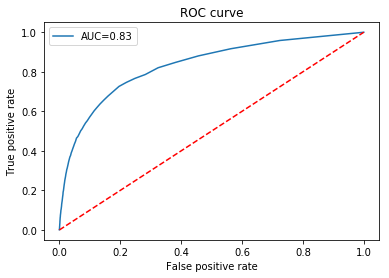

In [16]:
show_roc_curve(y_test, y_pred)

In [17]:
print_classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.94      0.99      0.96     43928
          1       0.54      0.17      0.26      3284

avg / total       0.91      0.93      0.92     47212



Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.83  0.17]]


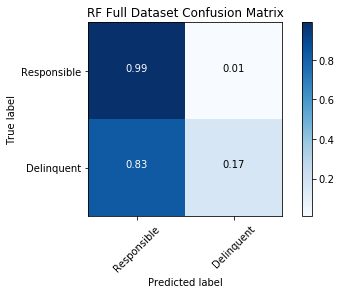

In [18]:
cm = confusion_matrix(y_test, rf.predict(X_test))
plot_confusion_matrix(cm,"RF Full Dataset Confusion Matrix")

In [114]:
lr, y_pred = run_LR_fit(X_train,X_test,y_train,y_test)

0.929382360417


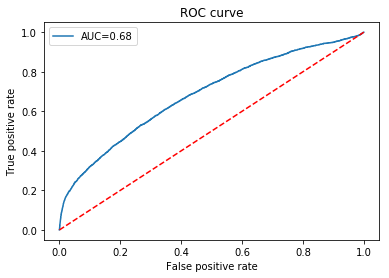

In [115]:
show_roc_curve(y_test, y_pred)

In [116]:
print_classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     43866
          1       0.54      0.02      0.04      3346

avg / total       0.90      0.93      0.90     47212



Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.98  0.02]]


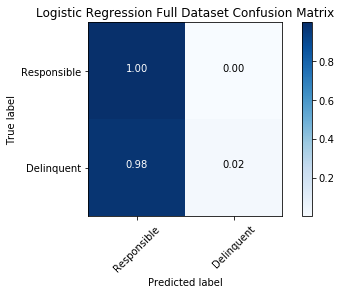

In [117]:
cm = confusion_matrix(y_test, lr.predict(X_test))
plot_confusion_matrix(cm, "Logistic Regression Full Dataset Confusion Matrix")

In [118]:
xgb, y_pred = run_XGB_fit(X_train,X_test,y_train,y_test)

0.933173769381


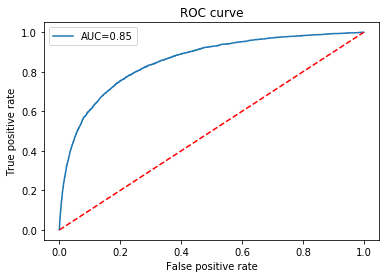

In [119]:
show_roc_curve(y_test, y_pred)

In [120]:
print_classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.94      0.99      0.96     43866
          1       0.60      0.17      0.27      3346

avg / total       0.92      0.93      0.92     47212



Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.83  0.17]]


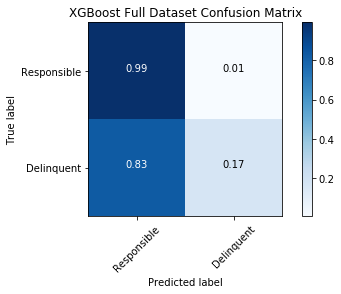

In [121]:
cm = confusion_matrix(y_test, xgb.predict(X_test))
plot_confusion_matrix(cm,"XGBoost Full Dataset Confusion Matrix")

# Now to compare with undersampling LR and RF and XGBoost

**Use Mike's notebook about ensemble undersampling**

In [19]:
def classification_setup(df_data):
    '''Returns X_data, y_data, ls_features'''
    X_data, y_data = df_data, df_data['SeriousDlqin2yrs']
    ls_features = list(X_data.keys())
    class_index = ls_features.index('SeriousDlqin2yrs')
    ls_features.pop(class_index)
    return X_data, y_data, ls_features

df_data = data
X_data, y_data, ls_features = classification_setup(df_data)


In [20]:
def cv_setup(X_data, y_data):
    '''Returns X_data, y_data, X_cv, y_cv, ls_features
    X_cv, y_cv are randomized 10% of data with same class
    proportions'''
    
    
    pos_events = X_data[X_data['SeriousDlqin2yrs'] == 1]
    neg_events = X_data[X_data['SeriousDlqin2yrs'] == 0]
    number_pos_events, number_neg_events, number_events = (len(pos_events), 
                                                           len(neg_events),
                                                           len(X_data))
    pos_events = pos_events.reindex(np.random.permutation(pos_events.index))
    neg_events = neg_events.reindex(np.random.permutation(neg_events.index))
    X_cv = pd.concat([neg_events.tail(number_neg_events//10), 
                      pos_events.tail(number_pos_events//10)])
    y_cv = X_cv['SeriousDlqin2yrs']

    #Get rid of duplicates between CV and Test/Train bank of data
    X_data = pd.concat([X_cv, X_data])
    X_data = (X_data.reset_index()
                    .drop_duplicates(subset= 'index', keep= False)
                    .set_index('index'))
    y_data = X_data['SeriousDlqin2yrs']
    
    return X_data, y_data, X_cv, y_cv, ls_features

In [21]:
def under_sample_kfold(X_data, y_data, n_folds = 10):
    '''Returns list of 10 (default) folds of
    X_train, X_test, y_train, y_test data'''
    
    pos_events = X_data[X_data['SeriousDlqin2yrs'] == 1]
    neg_events = X_data[X_data['SeriousDlqin2yrs'] == 0]
    
    #Randomize and pick same n number of events
    number_pos_events = len(pos_events)  
    undersampled_folds = []

    for fold in range(0, n_folds):
        pos_events = pos_events.reindex(np.random.permutation(pos_events.index))
        neg_events = neg_events.reindex(np.random.permutation(neg_events.index))
        undersampled_events = pd.concat([neg_events.head(number_pos_events), pos_events])
        X_data_u, y_data_u = undersampled_events, undersampled_events['SeriousDlqin2yrs']
        X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_data_u, y_data_u, test_size=0.3)
        undersampled_folds.append([X_train_u, X_test_u, y_train_u, y_test_u])
    return undersampled_folds


folds = under_sample_kfold(X_data, y_data)

In [22]:
def ensemble_score(X_test, y_test, models, cutoff = 0.5, e_cutoff = 5):
    '''Prints confusion matrix for an ensemble of models based on 
    probability cutoff (cutoff) of each model and voting cutoff 
    (e_cutoff) for an ensemble vote. Default is >50% probability
    and > 5 votes out of 10'''
    
    for fold in range(0, len(models)):
        X_test.loc[:, ('Prob fold ' + str(fold))] = models[fold].predict_proba(X_test[ls_features])[:,1]
        X_test.loc[:, ('ADAPred fold ' + str(fold))] = (X_test[('Prob fold ' + str(fold))] >= cutoff).astype(int)
    
    X_test.loc[:, 'Ensemble Score'] = X_test[['ADAPred fold ' + str(i) for i in range(0, len(models))]].sum(axis = 1)
    X_test.loc[:, 'Ensemble Pred'] = (X_test['Ensemble Score'] > e_cutoff).astype(int)

    ensemble_conf = confusion_matrix(y_test, X_test[('Ensemble Pred')])
    print (ensemble_conf)

In [23]:
def RF_undersample_ensemble(folds):
    
    X_train_all_folds = pd.DataFrame()
    RF_ensemble = []
    
    for fold in folds:
        X_train, X_test, y_train, y_test = fold[0], fold[1], fold[2], fold[3]
    
        rf = RandomForestClassifier(max_depth = 8, n_estimators = 100)
        rf.fit(X_train[ls_features], y_train)
        #Concatenate all train sets and store each fold models
        X_train_all_folds = pd.concat([X_train_all_folds, X_train])
        RF_ensemble.append(rf)
    
    #Call scorer
    ensemble_score(X_cv, y_cv, RF_ensemble)
    return RF_ensemble

In [218]:
def LR_undersample_ensemble(folds):
    
    X_train_all_folds = pd.DataFrame()
    LR_ensemble = []
    
    for fold in folds:
        X_train, X_test, y_train, y_test = fold[0], fold[1], fold[2], fold[3]
    
        lr = LogisticRegression()
        lr.fit(X_train[ls_features], y_train)
        #Concatenate all train sets and store each fold models
        X_train_all_folds = pd.concat([X_train_all_folds, X_train])
        LR_ensemble.append(lr)
    
    #Call scorer
    ensemble_score(X_cv, y_cv, LR_ensemble)
    return LR_ensemble

In [550]:
def XGB_undersample_ensemble(folds):
    
    X_train_all_folds = pd.DataFrame()
    XGB_ensemble = []
    
    for fold in folds:
        X_train, X_test, y_train, y_test = fold[0], fold[1], fold[2], fold[3]
    
        xgb = XGBClassifier()
        xgb.fit(X_train[ls_features], y_train)
        #Concatenate all train sets and store each fold models
        X_train_all_folds = pd.concat([X_train_all_folds, X_train])
        XGB_ensemble.append(xgb)
    
    #Call scorer
    ensemble_score(X_cv, y_cv, XGB_ensemble)
    return XGB_ensemble

In [24]:
#Remake our folds without including 10% of the data for a CV set
X_data, y_data, X_cv, y_cv, ls_features = cv_setup(X_data, y_data)
folds = under_sample_kfold(X_data, y_data)

In [25]:
rf_ensemble = RF_undersample_ensemble(folds)

[[8671 2304]
 [ 169  658]]


[[8688 2287]
 [ 206  621]] with n_estimators = 100, max_depth = 8

[[8705 2270]
 [ 215  612]] with n_estimators = 100

[[8344 2631]
 [ 199  628]]
 worst (off-the shelf)

In [26]:
type(rf_ensemble)

list

In [27]:
type(rf_ensemble[0])

sklearn.ensemble.forest.RandomForestClassifier

In [219]:
lr_ensemble = LR_undersample_ensemble(folds)

[[9618 1357]
 [ 342  485]]


In [545]:
type(xgb_clf)

xgboost.sklearn.XGBClassifier

In [551]:
xgb_ensemble = XGB_undersample_ensemble(folds)

[[8752 2223]
 [ 216  611]]


[[10933    42]
 [  278   549]] xgb orig

In [546]:
print(confusion_matrix(y_test, xgb_clf.predict(X_test)))

[[34500  9486]
 [  715  2511]]


In [548]:
print(confusion_matrix(y_test, rf_ensemble[0].predict(X_test)))

[[33017 10969]
 [  620  2606]]


In [552]:
cm_list = [confusion_matrix(y_test, xgb_ensemble[i].predict(X_test)) for i in range (0,len(xgb_ensemble))]

Normalized confusion matrix
[[ 0.79  0.21]
 [ 0.23  0.77]]


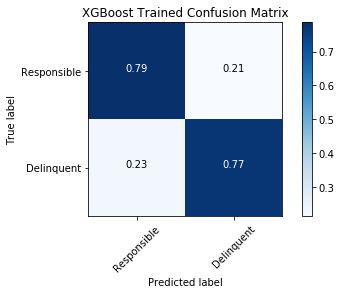

In [553]:
cm_list = [confusion_matrix(y_test, xgb_ensemble[i].predict(X_test)) for i in range (0,len(xgb_ensemble))]
cm_xgb = sum(cm_list)/len(cm_list)
plot_confusion_matrix(cm_xgb,"XGBoost Trained Confusion Matrix")

In [77]:
cm_list = [confusion_matrix(y_cv, rf_ensemble[i].predict(X_test)) for i in range (0,len(rf_ensemble))]

ValueError: Found input variables with inconsistent numbers of samples: [11802, 47212]

Normalized confusion matrix
[[ 0.78  0.22]
 [ 0.21  0.79]]


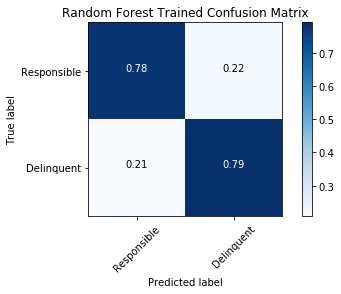

In [29]:
cm_rf = sum(cm_list)/len(cm_list)
plot_confusion_matrix(cm_rf,"Random Forest Trained Confusion Matrix")

Confusion matrix, without normalization
[[ 34332.1   9595.9]
 [   684.7   2599.3]]


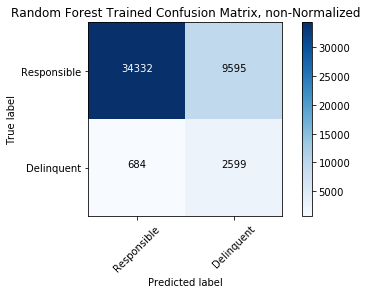

In [34]:
plot_confusion_matrix(cm_rf, "Random Forest Trained Confusion Matrix, non-Normalized",normalize=False)

In [135]:
print(confusion_matrix(y_test, lr.predict(X_test)))

[[43805    61]
 [ 3273    73]]


In [136]:
print(confusion_matrix(y_test, xgb.predict(X_test)))

[[43480   386]
 [ 2769   577]]


In [556]:
cm_list = [confusion_matrix(y_test, lr_ensemble[i].predict(X_test)) for i in range (0,len(lr_ensemble))]

Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.39  0.61]]


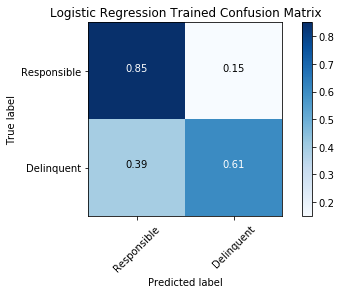

In [557]:
cm_lr = sum(cm_list)/len(cm_list)
plot_confusion_matrix(cm_lr,"Logistic Regression Trained Confusion Matrix")

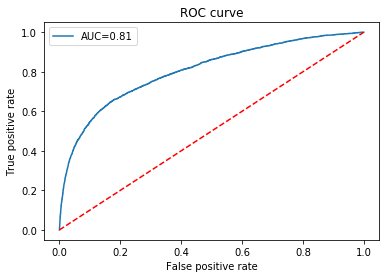

In [247]:
y_pred_lr_list = [lr_ensemble[i].predict_proba(X_test)[:] for i in range (0,len(lr_ensemble))]
y_pred_lr = sum(y_pred_lr_list)/len(y_pred_lr_list)
show_roc_curve(y_test,y_pred_lr[:,1])

# Learning curves

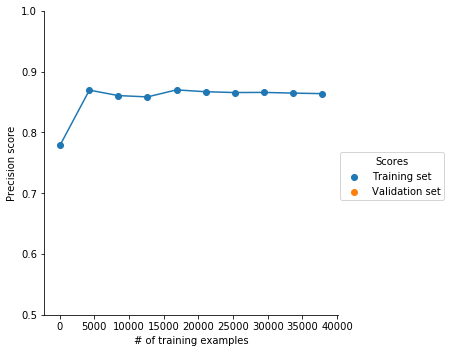

In [250]:
from sklearn.model_selection import (
    learning_curve, StratifiedShuffleSplit, GridSearchCV, cross_val_score,
    ShuffleSplit, cross_val_predict)

# Select 10 different sizes of the complete dataset
sample_space = np.linspace(100, len(X_test) * 0.8, 10, dtype='int')

# Compute learning curves without regularization
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=RandomForestClassifier(n_estimators = 10),
    X=X_test,
    y=y_test,
    train_sizes=sample_space,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=1),
    scoring='recall',
    n_jobs=-1
)

def make_tidy(sample_space, train_scores, valid_scores):
    # Join train_scores and valid_scores, and label with sample_space
    messy_format = pd.DataFrame(
        np.stack((sample_space, train_scores.mean(axis=1),
                  valid_scores.mean(axis=1)), axis=1),
        columns=['# of training examples', 'Training set', 'Validation set']
    )
    
    # Re-structure into into tidy format
    return pd.melt(
        messy_format,
        id_vars='# of training examples',
        value_vars=['Training set', 'Validation set'],
        var_name='Scores',
        value_name='Precision score'
    )

import seaborn as sns
# Initialize a FacetGrid object using the table of scores and facet on
# the score from the different sets
fig = sns.FacetGrid(
    make_tidy(sample_space, train_scores, valid_scores), hue='Scores', size=5
)

# Plot the learning curves, add a legend, and rescale y-axis
fig.map(plt.scatter, '# of training examples', 'Precision score')
fig.map(plt.plot, '# of training examples', 'Precision score') \
    .add_legend() \
    .set(ylim=(0.5, 1));


In [439]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(
    RandomForestClassifier(n_estimators=100), X_train, y_train, train_sizes=[50, 80, 110], cv=5)
train_sizes            

train_scores           


valid_scores    

array([[ 0.93,  0.93,  0.93,  0.93,  0.93],
       [ 0.93,  0.93,  0.93,  0.93,  0.93],
       [ 0.93,  0.93,  0.93,  0.93,  0.93]])

Automatically created module for IPython interactive environment
Learning curves took 33.67340707778931 seconds


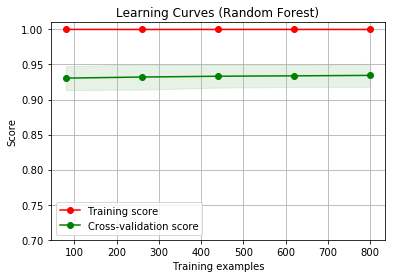

In [510]:
print(__doc__)

-

In [527]:
cross_val_score(rf_ensemble[1], X_test, y_test, scoring='recall')

array([ 0.14,  0.11,  0.14])

In [529]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [530]:
cm_rf_ens = []
for i in range(0,len(rf_ensemble)):
    cm_rf_ens.append(confusion_matrix(y_test, rf_ensemble[i].predict(X_test)))
    
plot_confusion_matrix(mean(cm_rf_ens),"Random Forest Trained Confusion Matrix")

TypeError: only length-1 arrays can be converted to Python scalars

Normalized confusion matrix
[[ 0.79  0.21]
 [ 0.09  0.91]]


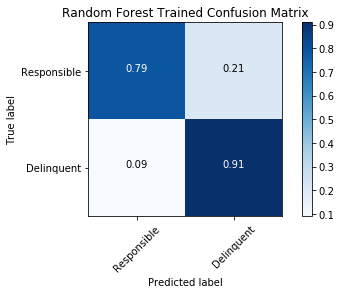

In [301]:
cm_rf = confusion_matrix(y_test, rf_ensemble.predict(X_test))
plot_confusion_matrix(cm_rf,"Random Forest Trained Confusion Matrix")

In [143]:
type(rf_ensemble)

sklearn.ensemble.forest.RandomForestClassifier

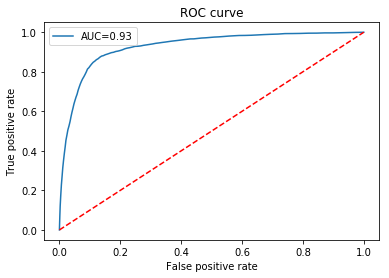

In [145]:
y_pred = rf_ensemble.predict_proba(X_test)[:,1]
show_roc_curve(y_test, y_pred)

FPR = false pos/total neg prec/recall lookign at one class only

In [303]:
featureHeaders

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [35]:
featureHeaders_readable = ['% Credit Used',
 'Age',
 'No. Times 1-2 months late',
 'Ratio Debt to Income',
 'Monthly Income',
 'No. Of Open Credit Lines',
 'No. Of Times 3 months late',
 'No. Of Real Estate Loans',
 'No. Of Times 2-3 months late',
 'No. Of Dependents']

In [40]:
importance_list = [rf_ensemble[i].feature_importances_ for i in range (0,len(rf_ensemble))]
importances = sum(importance_list)/len(importance_list)

Feature ranking:
1. % Credit Used (0.347862)
2. No. Of Open Credit Lines (0.181413)
3. No. Times 1-2 months late (0.174424)
4. Monthly Income (0.098844)
5. No. Of Times 3 months late (0.054547)
6. No. Of Real Estate Loans (0.049894)
7. Age (0.036869)
8. No. Of Times 2-3 months late (0.029017)
9. Ratio Debt to Income (0.018460)
10. No. Of Dependents (0.008670)


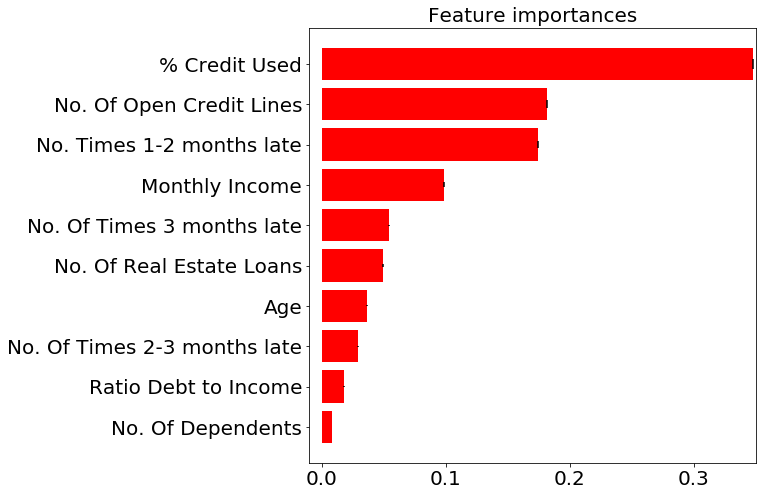

In [46]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


#importances = rf_ensemble.feature_importances_
std_list=[]
for i in range(0,len(rf_ensemble)):
    std_list.append(np.std([tree.feature_importances_ for tree in rf_ensemble[i].estimators_],
             axis=0))
    
std = sum(std_list)/len(std_list)
indices = np.argsort(importances)[::-1]

arr1 = indices
arr1inds = arr1.argsort()
arr2 = np.array(featureHeaders_readable) #featureHeaders is the name of my list of features
sorted_arr2 = arr2[arr1inds[::1]] #this bit of code sorts my list of features according to 
                                  #the order yielded by rf_ensemble.feature_importances_

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, sorted_arr2[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances", fontsize=20)
plt.barh(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.yticks(range(X_train.shape[1]), sorted_arr2, rotation=0, ha='right')
plt.gca().invert_yaxis()
plt.xlim([-0.01, 0.35])#X_train.shape[1]])
plt.gcf().set_size_inches(8,8)
plt.tick_params(labelsize=20)
plt.show()

display hist over other hist about predicted prob for those who were ground truth no and ground truth yes

In [268]:
X_test[0]

array([  1.40e-01,   6.80e+01,   1.00e+00,   3.14e-01,   1.33e+04,
         8.00e+00,   0.00e+00,   2.00e+00,   0.00e+00,   0.00e+00])

In [270]:
y_test[0]

1

In [265]:
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [267]:
data.loc[68214]

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.004833
age                                       77.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.000000
MonthlyIncome                           1740.000000
NumberOfOpenCreditLinesAndLoans            1.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 68214, dtype: float64

In [290]:
data.loc[71056,'SeriousDlqin2yrs']

1

In [313]:
type(X_test)

pandas.core.frame.DataFrame

In [341]:
type(y_test)

pandas.core.series.Series

In [325]:
test_Yeses = y_test.index[y_test.index[1]==1].tolist()

In [340]:
X_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
57459,0.794334,38,1,0.065857,5845.0,5,0,0,0,0.0
54185,0.273659,62,0,0.825301,1825.0,5,0,1,1,0.0
135298,0.019525,56,0,0.394063,12700.0,8,0,3,0,0.0
108495,0.782843,33,0,0.070937,5666.0,3,0,0,0,0.0
141222,0.000000,60,1,0.057094,5271.0,6,0,0,0,3.0
111583,0.103282,54,0,0.186818,9800.0,10,0,1,0,1.0
86777,0.030000,79,0,0.486681,8333.0,13,0,3,0,1.0
84186,0.199624,25,0,0.075693,3500.0,5,0,0,0,0.0
140320,0.006625,87,0,0.122480,6000.0,8,0,1,0,0.0
148914,0.076173,60,0,1.124750,2500.0,8,0,1,0,1.0


In [347]:
rf_predictions = rf_ensemble.predict_proba(X_test)

In [391]:
rf_predictions[1]

array([ 0.15,  0.85])

In [72]:
y_testarray=[]

del y_testarray[:]

In [73]:
for i in enumerate(y_test):
    y_testarray.append(i)

In [76]:
rf_1_prediction = []
rf_0_prediction = []

for i in range(0,len(rf_pred)):
    if (y_testarray[i] == 1):
        rf_1_prediction.append(rf_pred[i][1])
    else:
        rf_0_prediction.append(rf_pred[i][1])

IndexError: invalid index to scalar variable.

In [413]:
len(rf_1_prediction)/len(rf_0_prediction)
#The ratio holds at 7 percent!

0.07334151775564952

In [414]:
max(rf_0_prediction)

1.0

(array([ 10162.,   9052.,   6744.,   4421.,   4029.,   3423.,   2255.,
          1525.,   1384.,    991.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

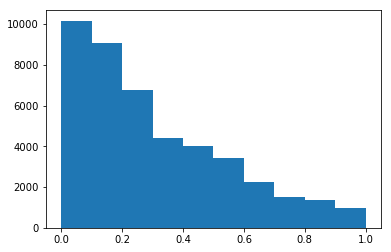

In [415]:
plt.hist(rf_0_prediction)

(array([   22.,    47.,    57.,    76.,    92.,   132.,   244.,   467.,
          751.,  1338.]),
 array([ 0.01,  0.11,  0.21,  0.31,  0.41,  0.51,  0.6 ,  0.7 ,  0.8 ,
         0.9 ,  1.  ]),
 <a list of 10 Patch objects>)

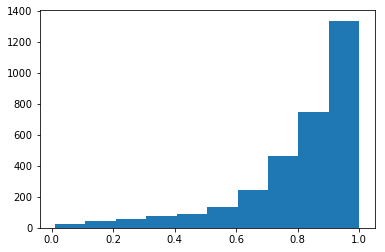

In [416]:
plt.hist(rf_1_prediction)

In [75]:
pred1_true0 = []
#for i in range (0,len(rf_0_prediction)):
#    if (rf_0_prediction[i] > 0.6):
#        count0 += 1
for j in [0:1:0.05]:
    for i in range (0,len(rf_1_prediction)):

        if (rf_1_prediction[i] < j):
            pred1_true0[i] += 1
(pred1_true0)/(len(rf_1_prediction))

SyntaxError: invalid syntax (<ipython-input-75-9b0d2f9166ca>, line 5)

In [503]:
rf_predictions_binary = rf_predictions[:,1] > 0.5

In [504]:
rf_predictions_binary

array([ True,  True, False, ..., False, False,  True], dtype=bool)

In [505]:
print(classification_report(y_testarray, rf_predictions_binary))

             precision    recall  f1-score   support

          0       0.99      0.79      0.88     43986
          1       0.24      0.91      0.38      3226

avg / total       0.94      0.80      0.85     47212



In [62]:
rf_pred_list = []
#for i in range(0,len(rf_ensemble)):
#    rf_pred_list.append(rf_ensemble[i].predict_proba(X_test)[:,1])
    
rf_pred_list = [rf_ensemble[i].predict_proba(X_test)[:,1] for i in range (0,len(rf_ensemble))]
rf_pred = sum(rf_pred_list)/len(rf_pred_list)

In [63]:
rf_pred

array([ 0.12,  0.26,  0.45, ...,  0.56,  0.12,  0.89])

In [280]:
data.shape

(118030, 11)

In [277]:
allNos = data.index[data['SeriousDlqin2yrs'] == False].tolist()

In [276]:
allYeses = data.index[data['SeriousDlqin2yrs'] == True].tolist()

In [278]:
len(allNos) + len(allYeses)

118030

In [520]:
oldscores = cross_val_score(rf_ensemble, X_train, y_train, cv=5)
#print np.mean(scores), np.std(scores)

AttributeError: 'list' object has no attribute 'fit'

In [522]:
rf_ensemble.predict_proba()

AttributeError: 'list' object has no attribute 'predict_proba'

In [459]:
clf = rf_ensemble

#param_grid = {"n_estimators" : [100, 30, 10], "oob_score": [True, False],
#              "max_features": ["sqrt", "log2", None], "max_depth" : [5, 3, None]}
param_grid = {"n_estimators" : [100, 50, 30], "max_depth" : [10, 8, 5, None]}

# "max_depth": [1,2,3], 
#              "min_samples_split": [2, 3, 4, 5], "min_samples_leaf": [1,2,3],
#              "min_weight_fraction_leaf": [0,0.25,0.5]}

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.5, random_state=0)

gridcv = GridSearchCV(clf, param_grid=param_grid, cv=sss, verbose=5, )
gridcv.fit(X_train, y_train)
random_forest_tuning_parameters = pd.DataFrame(gridcv.cv_results_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=10, n_estimators=100 ..................................
[CV]  max_depth=10, n_estimators=100, score=0.9321923804682425, total=   3.4s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  max_depth=10, n_estimators=100, score=0.9328419328419328, total=   3.5s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s


[CV]  max_depth=10, n_estimators=100, score=0.9328136914343811, total=   3.4s
[CV] max_depth=10, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.1s remaining:    0.0s


[CV]  max_depth=10, n_estimators=50, score=0.9319382078002768, total=   1.7s
[CV] max_depth=10, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.9s remaining:    0.0s


[CV]  max_depth=10, n_estimators=50, score=0.9327572086192776, total=   1.7s
[CV] max_depth=10, n_estimators=50 ...................................
[CV]  max_depth=10, n_estimators=50, score=0.9334914852156232, total=   1.8s
[CV] max_depth=10, n_estimators=30 ...................................
[CV]  max_depth=10, n_estimators=30, score=0.9318534835776215, total=   1.0s
[CV] max_depth=10, n_estimators=30 ...................................
[CV]  max_depth=10, n_estimators=30, score=0.9324183117286565, total=   1.0s
[CV] max_depth=10, n_estimators=30 ...................................
[CV]  max_depth=10, n_estimators=30, score=0.9333502781778644, total=   1.0s
[CV] max_depth=8, n_estimators=100 ...................................
[CV]  max_depth=8, n_estimators=100, score=0.9328984156570364, total=   2.9s
[CV] max_depth=8, n_estimators=100 ...................................
[CV]  max_depth=8, n_estimators=100, score=0.9330961055098986, total=   2.9s
[CV] max_depth=8, n_estimators=100 

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.4min finished


In [460]:
random_forest_tuning_parameters

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,3.141020,0.284065,0.932616,0.950794,10,100,"{'max_depth': 10, 'n_estimators': 100}",5,0.932192,0.952187,0.932842,0.950013,0.932814,0.950182,0.072406,0.014519,0.000300,0.000988
1,1.587411,0.139910,0.932729,0.950229,10,50,"{'max_depth': 10, 'n_estimators': 50}",4,0.931938,0.951566,0.932757,0.949278,0.933491,0.949843,0.029494,0.006357,0.000634,0.000973
2,0.932144,0.085394,0.932541,0.949806,10,30,"{'max_depth': 10, 'n_estimators': 30}",6,0.931853,0.951397,0.932418,0.948996,0.933350,0.949024,0.013345,0.002851,0.000617,0.001125
3,2.639833,0.226436,0.933143,0.942585,8,100,"{'max_depth': 8, 'n_estimators': 100}",1,0.932898,0.944590,0.933096,0.941936,0.933435,0.941230,0.059742,0.008541,0.000222,0.001447
4,1.294764,0.115575,0.932955,0.942416,8,50,"{'max_depth': 8, 'n_estimators': 50}",2,0.932390,0.942952,0.933068,0.942303,0.933407,0.941992,0.004992,0.003960,0.000423,0.000400
5,0.815460,0.069942,0.932776,0.942020,8,30,"{'max_depth': 8, 'n_estimators': 30}",3,0.932305,0.942726,0.932531,0.941343,0.933491,0.941992,0.035973,0.000806,0.000514,0.000565
6,1.950061,0.183720,0.932230,0.933906,5,100,"{'max_depth': 5, 'n_estimators': 100}",8,0.932334,0.934423,0.931938,0.933774,0.932418,0.933520,0.099163,0.013139,0.000209,0.000381
7,0.997141,0.100782,0.932174,0.933350,5,50,"{'max_depth': 5, 'n_estimators': 50}",9,0.932164,0.933689,0.931712,0.933520,0.932644,0.932842,0.028227,0.002825,0.000381,0.000366
8,0.567788,0.054387,0.932343,0.933802,5,30,"{'max_depth': 5, 'n_estimators': 30}",7,0.932079,0.934254,0.932475,0.934056,0.932475,0.933096,0.016828,0.002505,0.000186,0.000506
9,5.263004,0.568107,0.931515,0.999972,None,100,"{'max_depth': None, 'n_estimators': 100}",10,0.930865,0.999944,0.931430,0.999972,0.932249,1.000000,0.050184,0.012183,0.000568,0.000023


<h2> omg try lime on this </h2>

In [65]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

In [66]:
class_names = ["Responsible","Delinquent"]
X_train = np.array(X_train)
X_train[3]
X_test = np.array(X_test)

In [171]:
rf_ensemble

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

In [68]:
explainer = LimeTabularExplainer(
    X_train_np,
    class_names=['Responsible', 'Delinquent'],
    feature_names=featureHeaders_readable,
    discretize_continuous=True
)

In [71]:
example = np.random.randint(0, X_test_np.shape[1])
print(example)
exp = explainer.explain_instance(X_test_np[example], rf_pred, num_features=5)
print('Probability of delinquency:', exp.predict_proba[1])
fig = exp.as_pyplot_figure()

5


TypeError: 'numpy.ndarray' object is not callable

In [448]:
type(fig)

matplotlib.figure.Figure

In [591]:
exp.as_list()

list

In [592]:
exp_reasons = exp.as_list()

In [602]:
exp_reasons[0][0]

'Number Of Times 3 months late <= 0.00'

In [598]:
exp_reasons[0][1]

-0.27289566754314909

In [608]:
good_reasons = []
for i in range (0,len(exp_reasons)):
    if (exp_reasons[i][1] >= 0):
        print (exp_reasons[i][0])
    else:
        good_reasons.append(exp_reasons[i][0])
print()
good_reasons

% Credit Used > 0.58
Number Of Times 1-2 months late > 0.00
Age <= 40.00



['Number Of Times 3 months late <= 0.00',
 'Number Of Times 2-3 months late <= 0.00']

In [211]:
fig.savefig("lime_fig.png",bbox_inches='tight')

In [206]:
import pickle
import dill

def saveVar(variable_to_save, file_name):
    with open(file_name+'.pickle', "wb") as f:
        pickle.dump(variable_to_save, f)
        
def saveDill(variable_to_save, file_name):
    with open(file_name+'.dill', 'wb') as f:
        dill.dump(variable_to_save, f)

In [199]:
saveVar(rf_ensemble, 'Trained_RF')

In [200]:
saveDill(explainer,"Saved_Explainer")

Normalized confusion matrix
[[ 0.79  0.21]
 [ 0.09  0.91]]


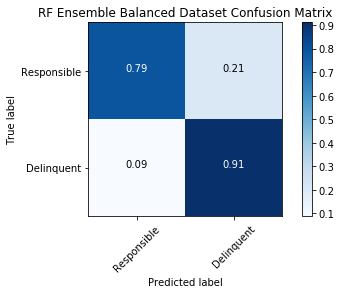

In [184]:
cm = confusion_matrix(y_test, rf_ensemble.predict(X_test))
plot_confusion_matrix(cm,"RF Ensemble Balanced Dataset Confusion Matrix")

In [190]:
accuracy = accuracy_score(y_test, rf_ensemble.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.13%


In [264]:
from sk import metrics
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(y_test, rf.predict(X_test))

ModuleNotFoundError: No module named 'sk'

**Now, just split train and test and undersample train (and test on regular test)**

In [ ]:
def classification_setup(df_data):
    '''Returns X_data, y_data, ls_features'''
    X_data, y_data = df_data, df_data['SeriousDlqin2yrs']
    ls_features = list(X_data.keys())
    class_index = ls_features.index('SeriousDlqin2yrs')
    ls_features.pop(class_index)
    return X_data, y_data, ls_features

df_data = data
X_data, y_data, ls_features = classification_setup(df_data)


In [ ]:
def cv_setup(X_data, y_data):
    '''Returns X_data, y_data, X_cv, y_cv, ls_features
    X_cv, y_cv are randomized 10% of data with same class
    proportions'''
    
    
    pos_events = X_data[X_data['SeriousDlqin2yrs'] == 1]
    neg_events = X_data[X_data['SeriousDlqin2yrs'] == 0]
    number_pos_events, number_neg_events, number_events = (len(pos_events), 
                                                           len(neg_events),
                                                           len(X_data))
    pos_events = pos_events.reindex(np.random.permutation(pos_events.index))
    neg_events = neg_events.reindex(np.random.permutation(neg_events.index))
    X_cv = pd.concat([neg_events.tail(number_neg_events//10), 
                      pos_events.tail(number_pos_events//10)])
    y_cv = X_cv['SeriousDlqin2yrs']

    #Get rid of duplicates between CV and Test/Train bank of data
    X_data = pd.concat([X_cv, X_data])
    X_data = (X_data.reset_index()
                    .drop_duplicates(subset= 'index', keep= False)
                    .set_index('index'))
    y_data = X_data['SeriousDlqin2yrs']
    
    return X_data, y_data, X_cv, y_cv, ls_features

In [17]:
data_pos = data[data.SeriousDlqin2yrs==True]
data_neg = data[data.SeriousDlqin2yrs==False]

In [18]:
data_neg_samp = data_neg.sample(frac=0.1, random_state=1)

In [19]:
balanced_data = pd.concat([data_neg_samp, data_pos], ignore_index=True)

In [20]:
featureHeaders = list(balanced_data.columns)
targetFeature = 'SeriousDlqin2yrs'
featureHeaders.remove(targetFeature)
train_percentage = 0.6
test_percentage = 1 - train_percentage
X_train, X_test, y_train, y_test = train_test_split(balanced_data[featureHeaders], balanced_data[targetFeature],
                                                       train_size=train_percentage, test_size=test_percentage)

In [21]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)[:,1]

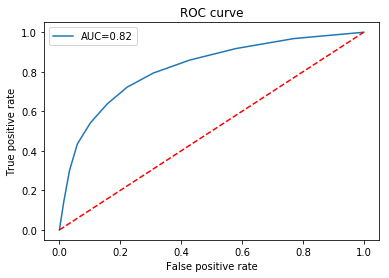

In [22]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc=auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label='AUC=%0.2f'% roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--')
plt.show()

             precision    recall  f1-score   support

          0       0.75      0.84      0.80      4363
          1       0.76      0.64      0.69      3337

avg / total       0.75      0.75      0.75      7700

